In [100]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import math
import numpy as np
from pathlib import Path
from dotenv import load_dotenv
from PIL import Image
import panel as pn
import hvplot.streamz 
import plotly.express as px
pn.extension("plotly")

## Import Data

In [101]:
#Monthly Data
#file_path = Path("monthly_combineall.csv")
#monthly_df = pd.read_csv(file_path, index_col="date")
#Daily Data
file_path = Path("Data\daily_combineall.csv")
daily_df = pd.read_csv(file_path, index_col="date")

In [102]:
#Calculate Daily Returns
daily_data = daily_df[['BTC','LTC','XRP','ETH','sp500_close', 'silver_close', 'gold_close', 'bonds5yr_close']]
#daily_data.head()
#daily_data2 = daily_df[['bonds5yr_change%']]
daily_data = daily_data.pct_change().dropna()
daily_data.head()
#daily_df = pd.concat([daily_data1, daily_data2], axis="columns", join="inner")

,BTC,LTC,XRP,ETH,sp500_close,silver_close,gold_close,bonds5yr_close
date,,,,,,,,
2020-07-29,-0.000967,-0.025972,-0.005820,-0.049003,0.003764,0.041050,0.005034,0.086957
2020-07-28,-0.016904,0.007308,-0.052744,-0.004820,-0.012276,-0.000863,-0.006475,0.040000
2020-07-27,0.007152,-0.047237,-0.028683,0.015338,0.006516,0.008272,-0.004328,0.153846
2020-07-24,-0.132290,-0.165580,-0.087731,-0.131561,-0.007341,-0.067385,-0.029610,-0.100000
2020-07-23,0.004633,0.015109,0.017295,-0.016211,0.006229,0.006039,-0.003953,0.000000


In [13]:
daily_df.isnull().sum()

BTC               0
BTC_change%       0
LTC               0
LTC_change%       0
XRP               0
XRP_change%       0
ETH               0
ETH_change%       0
sp500_close       0
sp500_change%     0
silver_close      0
silver_rate%      0
gold_close        0
gold_rate%        0
bonds5yr_close    0
dtype: int64

## Panel Data

In [103]:
#Welcome Panel
# Define a welcome text
welcome_text = "#### intro text here."

#Display Image
myImage = Image.open("Images/banner1.jpg");
#myImage.show();

# Panel Visulation Functions

In [105]:
# Define Panel visualization functions
#Portfolio Returns
def create_bar_low():
    #low risk daily
    bond_returns = round(0.5*(daily_df['bonds5yr_close'].sum()),2)
    crypto_returns = round(0.05*(daily_df['BTC'].sum() + daily_df['LTC'].sum() + daily_df['XRP'].sum() + daily_df['ETH'].sum()),2)
    commodity_returns = round(0.15*(daily_df['silver_close'].sum()+ daily_df['gold_close'].sum() ),2)
    share_returns = round(0.3*(daily_df['sp500_close'].sum()),2)
    #Plot
    low_risk_dailyreturns_df = pd.DataFrame([bond_returns,crypto_returns,commodity_returns, share_returns])
    low_risk_dailyreturns_df = low_risk_dailyreturns_df.rename(columns={0:'Portfolio Returns Low Risk'},index ={0:'Bonds',1:'Crypto',2:'Commodity',3:'Shares'} )
    low_risk_dailyreturns_df.rename(columns={0:'Low Risk Returns'},inplace = True)
    low_risk_bar_plot = low_risk_dailyreturns_df.hvplot.bar()
    return low_risk_bar_plot

In [106]:
def create_bar_med():
    #medium risk daily
    bond_returns = round(0.2*(daily_df['bonds5yr_close'].sum()),2)
    crypto_returns = round(0.10*(daily_df['BTC'].sum() + daily_df['LTC'].sum() + daily_df['XRP'].sum() + daily_df['ETH'].sum()),2)
    commodity_returns = round(0.20*(daily_df['silver_close'].sum()+ daily_df['gold_close'].sum() ),2)
    share_returns = round(0.50*(daily_df['sp500_close'].sum()),2)
    #Plot
    neutral_risk_dailyreturns_df = pd.DataFrame([bond_returns,crypto_returns,commodity_returns, share_returns])
    neutral_risk_dailyreturns_df = neutral_risk_dailyreturns_df.rename(columns={0:'Portfolio Returns Neutral Risk'},index ={0:'Bonds',1:'Crypto',2:'Commodity',3:'Shares'} )
    neutral_risk_bar_plot = neutral_risk_dailyreturns_df.hvplot.bar()
    return neutral_risk_bar_plot

In [107]:
def create_bar_high():
        #high risk daily
    bond_returns = round(0.05*(daily_df['bonds5yr_close'].sum()),2)
    crypto_returns = round(0.3*(daily_df['BTC'].sum() + daily_df['LTC'].sum() + daily_df['XRP'].sum() + daily_df['ETH'].sum()),2)
    commodity_returns = round(0.15*(daily_df['silver_close'].sum()+ daily_df['gold_close'].sum() ),2)
    share_returns = round(0.50*(daily_df['sp500_close'].sum()),2)
    #Plot
    high_risk_dailyreturns_df = pd.DataFrame([bond_returns,crypto_returns,commodity_returns, share_returns])
    high_risk_dailyreturns_df = high_risk_dailyreturns_df.rename(columns={0:'Portfolio Returns High Risk'},index ={0:'Bonds',1:'Crypto',2:'Commodity',3:'Shares'} )
    high_risk_bar_plot =  high_risk_dailyreturns_df.hvplot.bar()
    return high_risk_bar_plot

## Calculate daily returns 

In [108]:
def read_data():
    # Read file 
    portfolio_data = Path('Data/daily_combineall.csv')
    portfolio_df = pd.read_csv(portfolio_data, index_col="date", infer_datetime_format=True, parse_dates=True)

    # Sorting the date index in ascending order
    portfolio_df = portfolio_df.sort_index()
    
    # Remove close price columns
    columns=['BTC_change%','LTC_change%','XRP_change%','ETH_change%','sp500_change%','gold_rate%','silver_rate%']
    portfolio_df= portfolio_df.drop(columns, axis=1)
    
    #rename columns
    portfolio_df.rename(columns = {'bonds5yr_close':'bonds','silver_close':'silver','sp500_close':'sp500','gold_close':'gold'},inplace=True)
    portfolio_df=portfolio_df.sort_values(by='date',ascending=True)  
    return portfolio_df

In [109]:
#Risk Analysis
def calculate_standard_dev():    
    df = read_data()
    # Row wise Daily Standard Deviations of all portfolio
    daily_std=df.std(axis=0)  
    assets_std = daily_std.hvplot(xlabel=" Assests ", 
                                 ylabel="Assests Standard Deviation Value", 
                                 title = 'Standard Deviation',
                                 kind='line',
                                 width=400, 
                                 height=300
                            ).opts(axiswise=True)    
    return assets_std

In [130]:
def combine_assets_dailyvalue():
    #read the daily comibneall file
    daily_data = Path("Data/daily_combineall.csv")
    daily_df = pd.read_csv(daily_data, index_col="date", infer_datetime_format=True, parse_dates=True)
    
    daily_df1 = daily_df[['BTC','LTC','XRP','ETH', 'sp500_close', 'silver_close', 'gold_close','bonds5yr_close']]
    daily_df1 = daily_df1.pct_change().dropna()
    #daily_df1 = pd.concat([daily_df1, daily_df2], axis="columns", join="inner")

    #extrat sp500 and bonds data from daily file
    sandp_bonds_return = daily_df1[['bonds5yr_close', 'sp500_close']]
    sandp_bonds_return = sandp_bonds_return.dropna().copy()
    #extract commodity value from the daily file
    join_cmod_df = daily_df[['silver_close', 'gold_close']]
    cmod_returns = join_cmod_df.pct_change()
    cmod_returns = cmod_returns.dropna().copy()
    # calculate % change of commodity
    #weights = [0.50, 0.50]
    weights = [0.83,0.17]
    cmod_returns['cmod_change%'] = cmod_returns.dot(weights)
    cmod_returns = cmod_returns[['cmod_change%']]
    #combine crypto currency coins as one assest
    join_crypto_df = daily_df[['BTC', 'LTC', 'XRP', 'ETH']]
    crypto_returns = join_crypto_df.pct_change()
    crypto_returns = crypto_returns.dropna().copy()
    #calculate crypto %change 
    #weights = [0.20, 0.20, 0.20, 0.20]
    weights=[0.813, 0.14, 0.012, 0.161]
    crypto_returns['crypto_change%'] = crypto_returns.dot(weights)
    crypto_change = crypto_returns[['crypto_change%']]
    # combine all the returns in one dataframe
    all_returns = pd.concat([sandp_bonds_return, crypto_change, cmod_returns], axis="columns", join="inner")
    all_returns = all_returns.sort_index()    
    all_returns.columns = ['Bonds Change %', 'S&P 500 Change %', 'Crypto Change %', 'Commodity Change %']
    return all_returns

In [131]:
def daily_returns_averse():    
    risk_returns_av = combine_assets_dailyvalue()
    weights_risk_averse = [0.5,0.3,0.05,0.15]
    risk_returns_av['Risk Averse'] = risk_returns_av.dot(weights_risk_averse)
    averse_plot = risk_returns_av['Risk Averse'].hvplot.line(figsize=(30,15), title='Daily Returns for Risk Averse Strategy \n')  
    return averse_plot

In [132]:
def daily_returns_neutral():    
    risk_returns_neutral = combine_assets_dailyvalue()
    weights_risk_neutral = [0.2,0.5,0.1,0.2]
    risk_returns_neutral['Risk Neutral'] = risk_returns_neutral.dot(weights_risk_neutral)
    neutral_plot = risk_returns_neutral['Risk Neutral'].hvplot.line(figsize=(30,15), title='Daily Returns for Risk Neutral Strategy \n')  
    return neutral_plot

In [133]:
def daily_returns_high():    
    risk_returns_high = combine_assets_dailyvalue()
    weights_risk_high = [0.05,0.5,0.30,0.15]
    risk_returns_high['Risk High'] = risk_returns_high.dot(weights_risk_high)
    high_plot = risk_returns_high['Risk High'].hvplot.line(figsize=(30,15), title='Daily Returns for High Risk Strategy \n')  
    return high_plot

In [117]:
def cumulative_prod(title,weights):
    portfolio_df=combine_assets_dailyvalue()
    daily_returns = portfolio_df.pct_change()[1:]    
    weighted_returns = (weights * daily_returns)
    port_ret = weighted_returns.sum(axis=1)
    cumulative_ret = (port_ret + 1).cumprod()    
    fig =plt.figure()
    ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    ax1.plot(cumulative_ret)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(title)
    ax1.set_title("Assets Cumulative Returns")
    plt.show()
    fig.savefig('Images\RiskAverse_return.jpg') 

In [118]:
def calculate_sharpe_ratio():
    df = read_data()
    # Daily Returns
    daily_return = df.pct_change().dropna().copy()
   
    # Calculate sharpe ratio
    sharpe_ratios = (daily_return.mean() * 252) / (daily_return.std() * np.sqrt(252))
    ratiochart = sharpe_ratios.hvplot(line_color='green',ylabel='Sharpe Ratio', xlabel = 'Assets',title="Sharpe Ratio of Assests",  width=400, height=300, invert= True)
    return ratiochart    
    

In [119]:
def monte_carlo_simulation():  
    fig =plt.figure()
    df = read_data()
    #set up empty list to hold our ending values for each simulated price series
    result = []
    #Define Variables
    S = df['sp500'][-1] #starting stock price (i.e. last available real stock price)    
    T = 252 #Number of trading days
    mu = 0.2309 #Return
    vol = 0.4259 #Volatility
    #choose number of runs to simulate - I have chosen 10,000
    for i in range(500):
        #create list of daily returns using random normal distribution
        daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
        #set starting price and create price series generated by above random daily returns
        price_list = [S]
    
        for x in daily_returns:
            price_list.append(price_list[-1]*x)
            #plot data from each individual run which we will plot at the end
        plt.plot(price_list)
    
        #append the ending value of each simulated run to the empty list we created at the beginning
        result.append(price_list[-1])
    #show the plot of multiple price series created above
    fig.show()
    plt.title("SP500 Montecarlo Simulation")
    plt.figure(figsize=(10, 5))
    #plt.show()
    fig.savefig('Images/MonteCarlo_Simulation.jpg')

In [7]:
#Algorithim

## Panel Dashboard

ValueError: When stacked is True, each column must be either all positive or negative.BTC_change% contains both positive and negative values

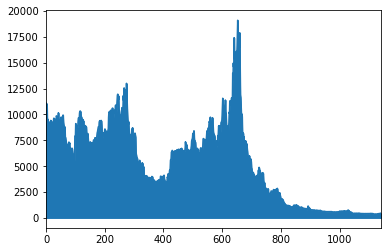

In [142]:
# Create a Title for the Dashboard
title = "# Portfolio Analysis of Investroo.com Client from 2015 to 2020"
welcome_text = "### This dashboard presents a visual analysis of Historical Crypto, Stock, Commodity and Yield bond Values, Portfoio returns analysis of High, Neturla and Averse risk assets, Risk Analysis and comparsion between assets and algorithm trading of assest based on historical data from 2015 to 2016. You can navigate through the tabs above to explore more details about the evolution of the differnt assest on the 4~5 across the years. "

# Create a tab layout for the dashboard
# 1. first tab
welcome_panel = pn.Column(title, welcome_text, myImage)

# 2.second tab -Portfolio returns
returns_low_tab = pn.Column(create_bar_low)
returns_med_tab = pn.Column(create_bar_med)
returns_high_tab = pn.Column(create_bar_high)


# 3. third tab - risk Analysis
#monte_carlo_simulation()
#cumulative_prod("Cumulative Returns of Risk Averse",[0.5,0.3,0.05,0.15])
#cumulative_prod("Cumulative Returns of Risk Netural",[0.2,0.5,0.1,0.2])
#cumulative_prod("Cumulative Returns of High Risk",[0.05,0.5,0.30,0.15])

row1= pn.Row(Image.open("Images/RiskAverse_return.jpg"),Image.open("Images/Montecarlo_Simulation.jpg"))
row2= pn.Row(calculate_standard_dev(),calculate_sharpe_ratio())
column_of_calcrisk= pn.Column(row1,row2)
row3 = pn.Row(read_data().hvplot(x='date', y=['BTC','LTC','XRP','ETH','sp500','gold', 'silver'], value_label='Assets Daily Close Price', title='Comparison of Close Price of All Assets'),daily_returns_averse())
row4= pn.Row(daily_returns_neutral(),daily_returns_high())
column_of_riskdata= pn.Column(row3,row4)
column_of_highrisk= pn.Column(daily_df.hvplot(x='date', y=['BTC','LTC','XRP','ETH','sp500_close','gold_close', 'silver_close', 'BTC_change%','LTC_change%','XRP_change%','ETH_change%','sp500_change%','gold_rate%', 'silver_rate%'], 
                width=300, heiht=200, subplots=True, shared_axes=False).cols(7))

# 4. forth tab - Algorithm trading

# Create the main dashboard
tab = pn.Tabs(("Welcome", welcome_panel),
                   ("Portfolio Returns",pn.Tabs(("Low Risk",returns_low_tab),("Medium Risk",returns_med_tab),("High Risk",returns_high_tab))),
                   ("Risk Analysis",pn.Tabs(("Assets Risk Calculation", column_of_calcrisk),("Daily Returns of Assets",column_of_riskdata),("Assets Price Variation",column_of_highrisk))),
                   ("Algorithm"))
dashboard = pn.Column(title, tab)

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] PNG(JpegImageFile)
        [1] Tabs
            [0] Column
                [0] Column
                    [0] Column()
                    [1] Row
                        [0] HoloViews(Bars, name='interactive61543')
            [1] Column
                [0] Column
                    [0] Column()
                    [1] Row
                        [0] HoloViews(Bars, name='interactive61627')
            [2] Column
                [0] Column
                    [0] Column()
                    [1] Row
                        [0] HoloViews(Bars, name='interactive61711')
        [2] Tabs
            [0] Column
                [0] Row
                    [0] PNG(JpegImageFile)
                    [1] PNG(JpegImageFile)
                [1] Row
                    [0] HoloViews(Curve)
                    [1] HoloViews(Curve)
            [1] Column
                [0] Row
                    [0] HoloViews(NdOverlay)
                    [1] HoloViews(Curve)
                [1] Row
                    [0] HoloViews(Curve)
                    [1] HoloViews(Curve)
            [2] Column()
        [3] Markdown(str)
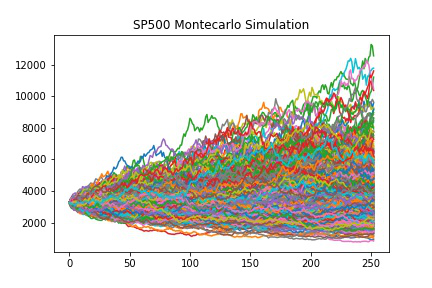
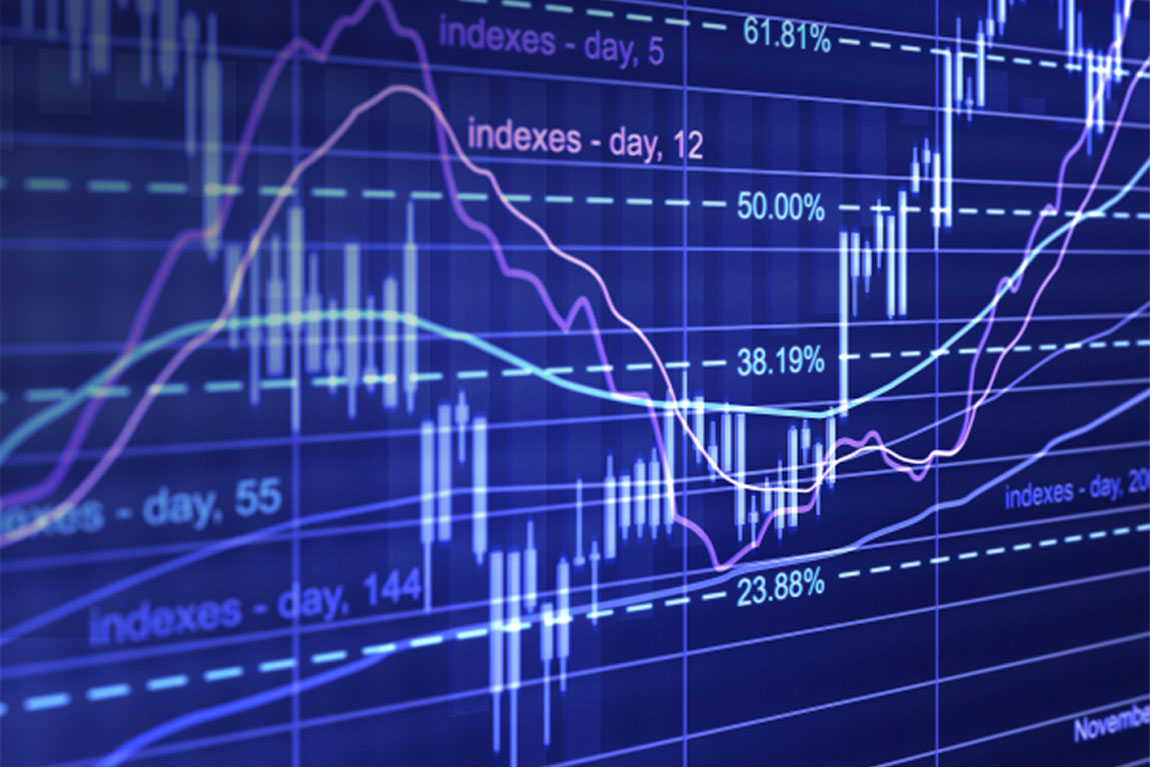
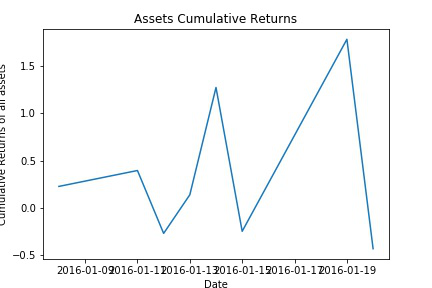

In [140]:
dashboard.servable()

In [ ]:
#daily_data2 = daily_df[['bonds5yr_change%']]

#daily_data1 = daily_data1.pct_change().dropna()
#daily_df = pd.concat([daily_data1, daily_data2], axis="columns", join="inner")